In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import sparsetools as sp
from matplotlib.colors import LogNorm

In [2]:
obs = sp.profile("obs/ibis_alma6_obs.nc").extractPix(x1=320,y1=320)
nlte_mod = sp.model("nlte/nlte_mod_2_filt.nc")
alma_mod = sp.model("alma/alma_mod_2.nc")

profile::setsize: nx=334, ny=334, nw=94, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=94, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=320, ny=320, ndep=61, nt=1
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
model::read: atmos type -> depth-stratified
model::read: nx=320, ny=320, ndep=61, nt=1
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1


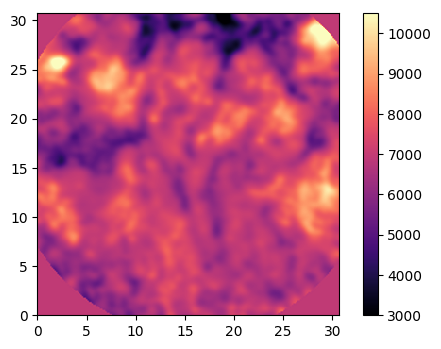

In [19]:
plt.imshow(obs.dat[0,:,:,-1,0]*5900,extent=[0,320*0.096,0,320*0.096],\
           cmap='magma',origin='lower',vmin=3000,vmax=10500)
plt.colorbar()

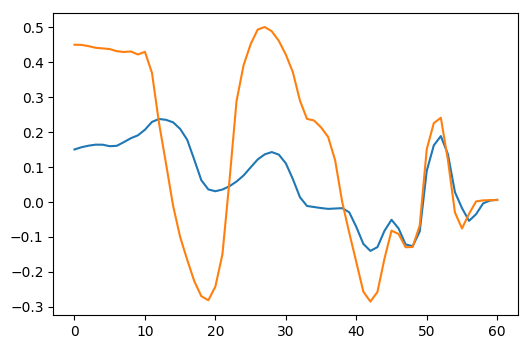

In [25]:
corr = np.zeros(61)
for i in range(61):
    corr[i] = np.corrcoef(obs.dat[0,:,:,-1,0].ravel(),nlte_mod.temp[0,:,:,i].ravel())[0,1]
plt.plot(corr)
for i in range(61):
    corr[i] = np.corrcoef(obs.dat[0,:,:,-1,0].ravel(),alma_mod.temp[0,:,:,i].ravel())[0,1]
plt.plot(corr)

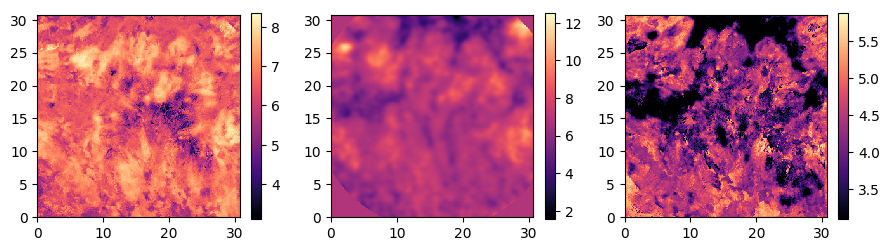

In [31]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.imshow(alma_mod.temp[0,:,:,10]/1e3,extent=[0,320*0.096,0,320*0.096],cmap='magma',origin='lower')
plt.colorbar(fraction=0.046)
plt.xlabel
plt.subplot(132)
plt.imshow(obs.dat[0,:,:,-1,0]*5.9,extent=[0,320*0.096,0,320*0.096],cmap='magma',origin='lower')
plt.colorbar(fraction=0.046)
plt.subplot(133)
plt.imshow(alma_mod.temp[0,:,:,27]/1e3,extent=[0,320*0.096,0,320*0.096],cmap='magma',origin='lower')
plt.colorbar(fraction=0.046)
plt.tight_layout()

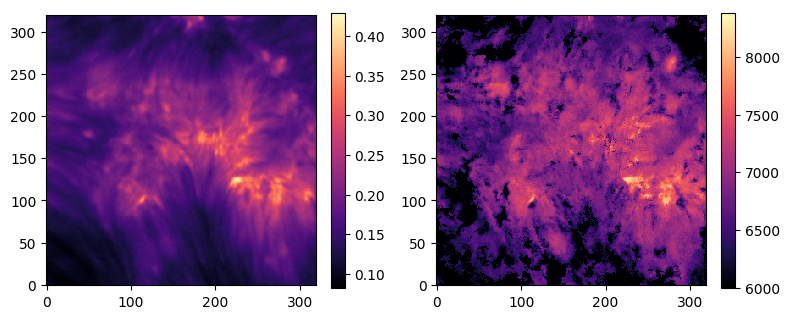

In [21]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(obs.dat[0,:,:,68,0],cmap='magma',origin='lower')
plt.colorbar(fraction=0.046)
plt.subplot(122)
plt.imshow(alma_mod.temp[0,:,:,14],cmap='magma',origin='lower',vmin=6000)
plt.colorbar(fraction=0.046)
plt.tight_layout()

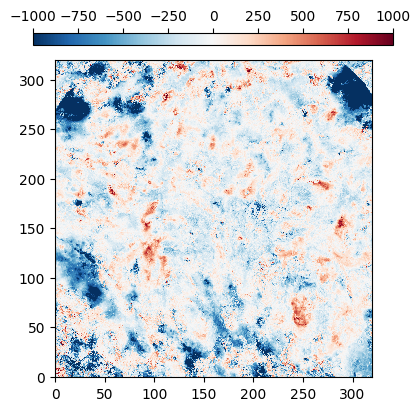

In [22]:
fig,ax = plt.subplots(1,1,constrained_layout=True)
im = ax.imshow((alma_mod.temp-nlte_mod.temp)[0,:,:,14],cmap='RdBu_r',origin='lower',vmin=-1000,vmax=1000)
fig.colorbar(im,ax=ax,location='top',shrink=0.6,fraction=0.04,pad=0)

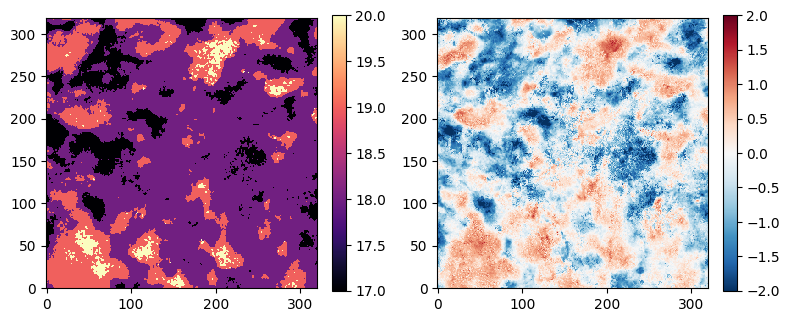

In [23]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(np.argmin(obs.dat[0,:,:,:50,0],-1),cmap='magma',origin='lower')
plt.colorbar(fraction=0.046)
plt.subplot(122)
plt.imshow(alma_mod.vlos[0,:,:,36]/1e5,cmap='RdBu_r',vmin=-2,vmax=2,origin='lower')
plt.colorbar(fraction=0.046)
plt.tight_layout()

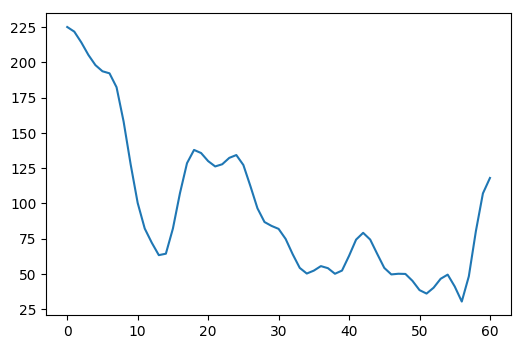

In [24]:
from scipy.ndimage import median_filter
im = alma_mod.vlos[0]/1e5
med = median_filter(im,(3,3,1))
dif = im - med
rms = np.sqrt(np.sum(dif**2,(0,1)))
plt.plot(rms)